In [1]:
#import numpy as np
import pandas as pd
#import cv2
import os
import pathlib
#libraries for plotting the model
import pydot
import pydotplus
from pydotplus import graphviz
from tensorflow.keras.utils import plot_model
import h5py

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
#import seaborn as sns

from IPython.display import Image

pd.options.display.max_rows=20

# Turn off future warnings 
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning) 


os.listdir('/Users/ankushsingal/Desktop/TF_2_Notebooks_and_Data/04-CNNs')


/usr/local/anaconda3/envs/nlp_course/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/envs/nlp_course/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/envs/nlp_course/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/envs/nlp_course/lib

['model.json',
 'mnist-2.ipynb',
 'serving',
 '.DS_Store',
 '02-Keras-CNN-CIFAR-10.ipynb',
 'mnist.ipynb',
 'model.png',
 'mnist-digit-model',
 '05-DL-CV-Assessment-Solution.ipynb',
 'myfirstmodel.h5',
 'malaria_detector.h5',
 'cifar_10epochs.h5',
 '03-Deep-Learning-Custom-Images-Malaria.ipynb',
 'model.h5',
 '04-DL-CV-Assessment.ipynb',
 'larger_CIFAR10_model.h5',
 '.ipynb_checkpoints',
 'Image1.png',
 '01-Keras-CNN-MNIST.ipynb']

In [2]:
#print("numpy :", np.__version__)
print("pandas :", pd.__version__)
print("tensorflow :", tf.__version__)


pandas : 1.2.4
tensorflow : 1.14.0


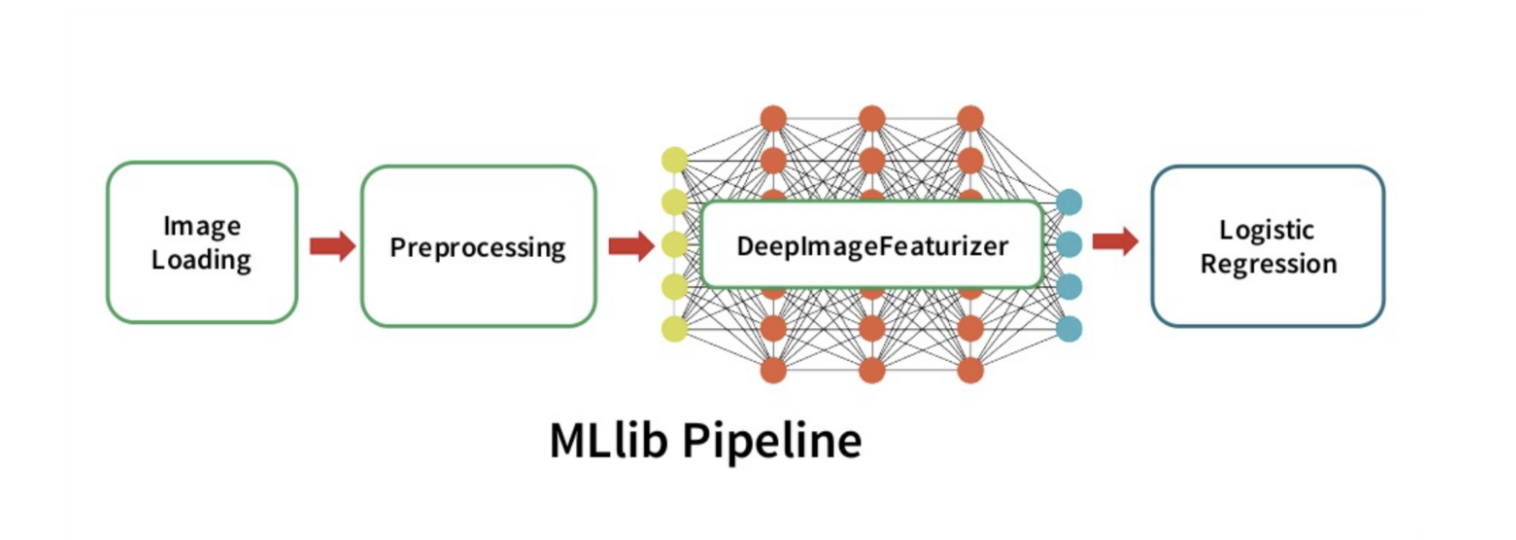

In [3]:
Image(filename='Image1.png')

# MNIST database
MNIST database, processed from the files coming from this website, using your own code. If you use 3rd party libraries, please specify which ones and at which versions so that we can easily run your script.

To generate an image of a sequence, the digits have to be stacked horizontally and the spacing between them should follow a uniform distribution over a range determined by two user specified numbers. The numerical values of the digits themselves are provided by the user and each digit in the generated sequence is then chosen randomly from one of its representations in the MNIST dataset.

The width of the output image in pixels is specified by the user, while the height should be 28 pixels (i.e. identical to that of the MNIST digits). The code should contain both an API and a script.

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
sample_image = x_train[0]

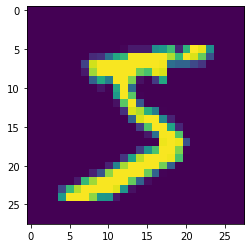

In [6]:
plt.imshow(sample_image)

# ONE HOT ENCODING

In [7]:
y_example = to_categorical(y_train)

In [8]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [9]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [10]:
#normalize
x_train = x_train/255
x_test = x_test/255

In [11]:
scaled_image = x_train[0]
scaled_image.max()

1.0

In [12]:
#batch_size,width,height,color_channels
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

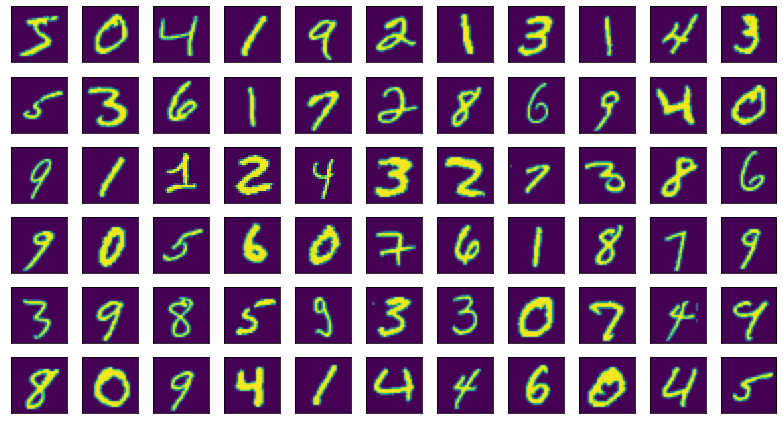

In [13]:
# Now lets take a look at some of our triaining images!

plt.figure(figsize=(11,6))
for i in range(66): 
    plt.subplot(6,11,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

# BUILDING A MODEL

In [14]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),strides = (1,1),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))

#OUTPUT layer, softmax--MULTI-CLASS
model.add(Dense(10,activation='softmax'))

#for metrics, keras.io/metrics
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

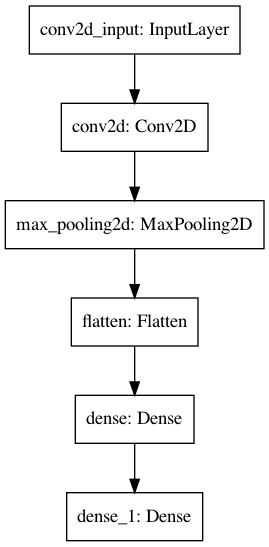

In [18]:
tf.keras.utils.plot_model(
    model, to_file='model.png'
)

# TRAINING MODEL

In [19]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1344 - acc: 0.9597 - val_loss: 0.0522 - val_acc: 0.9826
Epoch 2/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0474 - acc: 0.9851 - val_loss: 0.0447 - val_acc: 0.9859
Epoch 3/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0303 - acc: 0.9902 - val_loss: 0.0397 - val_acc: 0.9872
Epoch 4/10
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0209 - acc: 0.9931 - val_loss: 0.0436 - val_acc: 0.9863


# MODEL EVALUATION

In [20]:
losses = pd.DataFrame(model.history.history)

In [21]:
losses.head()

,loss,acc,val_loss,val_acc
0,0.134374,0.959700,0.052225,0.9826
1,0.047386,0.985150,0.044703,0.9859
2,0.030308,0.990183,0.039656,0.9872
3,0.020882,0.993117,0.043629,0.9863


<AxesSubplot:>

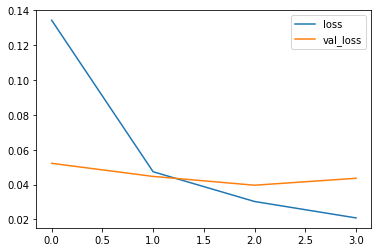

In [22]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

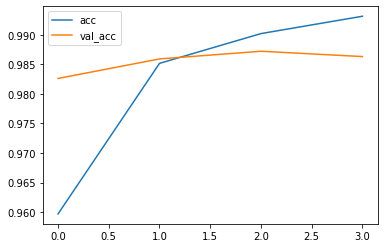

In [23]:
losses[['acc','val_acc']].plot()

In [24]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'acc']
[0.04362876098635025, 0.9863]


In [25]:
#pip install sklearn

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
predictions = model.predict_classes(x_test)


In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.96      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [29]:
confusion_matrix(y_test,predictions)

array([[ 968,    1,    1,    1,    0,    1,    5,    0,    3,    0],
       [   0, 1131,    1,    0,    0,    0,    1,    0,    2,    0],
       [   1,    2, 1017,    6,    0,    0,    0,    4,    2,    0],
       [   0,    0,    0, 1009,    0,    1,    0,    0,    0,    0],
       [   1,    0,    0,    0,  961,    0,    5,    0,    4,   11],
       [   2,    0,    0,   16,    0,  860,    4,    0,   10,    0],
       [   4,    2,    0,    0,    1,    1,  949,    0,    1,    0],
       [   0,    1,    6,    2,    0,    0,    0, 1014,    3,    2],
       [   3,    0,    3,    0,    0,    0,    0,    0,  967,    1],
       [   1,    2,    1,    3,    2,    4,    0,    4,    5,  987]])

# Predicting a given image

In [30]:
my_number = x_test[0]

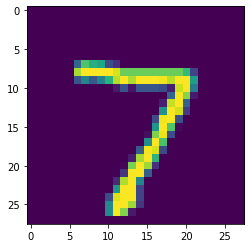

In [31]:
plt.imshow(my_number.reshape(28,28))

In [32]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])

y_test_pred (i=0):  7
y_test_true (i=0):  7
X_test (i=0): 


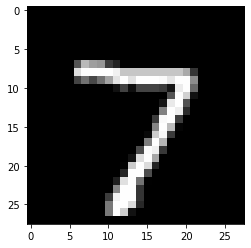

y_test_pred (i=1):  2
y_test_true (i=1):  2
X_test (i=1): 


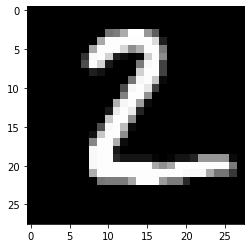

y_test_pred (i=2):  1
y_test_true (i=2):  1
X_test (i=2): 


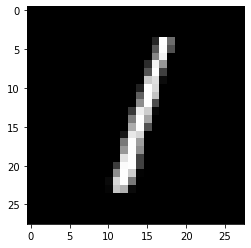

In [33]:
for i in [0,1,2]:
    y_true = y_test[i]
    y_pred = model.predict_classes(x_test[i].reshape(1,28,28,1))[0]
    print("y_test_pred", "(i="+str(i)+"): ", y_pred)
    print("y_test_true", "(i="+str(i)+"): ", y_true)
    print("X_test", "(i="+str(i)+"): ")    
    plt.imshow(x_test[i], cmap='gray')
    plt.show()

/usr/local/anaconda3/envs/nlp_course/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


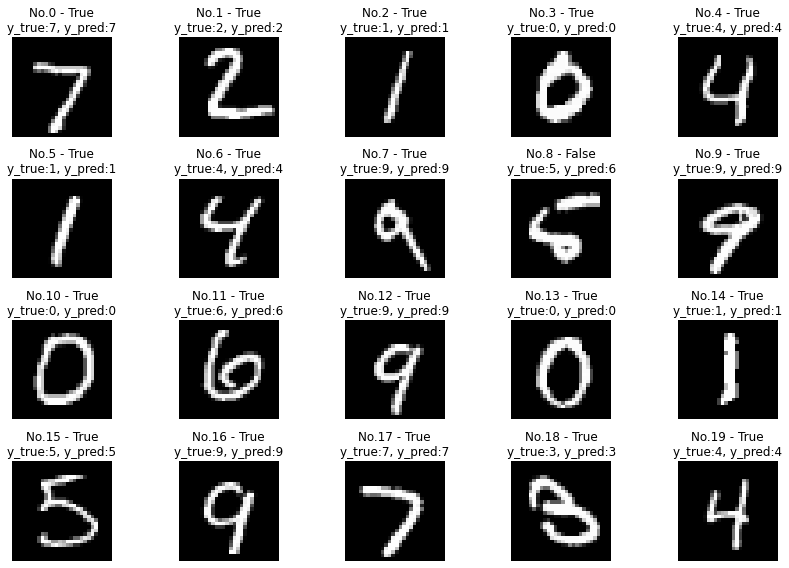

In [34]:
fig = plt.figure(figsize=(12, 8))

ROW = 4
COLUMN = 5

for i in range(ROW * COLUMN):
    y_true = y_test[i]
    y_pred = model.predict_classes(x_test[i].reshape(1,28,28,1))[0]
    
    if y_true == y_pred:
        result = "True" # Correct answer from the model
    else:
        result = "False" # Incorrect answer from the model
    
    plt.subplot(ROW, COLUMN, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("No.{} - {}\ny_true:{}, y_pred:{}".format(i, result, y_true, y_pred))
    plt.axis("off")

fig.tight_layout()
fig.show()

#https://www.ailab.ics.keio.ac.jp/b4_induction_training/docs/dl/mnist_notebook.html

# MODEL DEPLOYMENT

In [35]:
epochs =len(losses)
epochs

4

In [36]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),strides = (1,1),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))

#OUTPUT layer, softmax--MULTI-CLASS
model.add(Dense(10,activation='softmax'))

#for metrics, keras.io/metrics
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
model.fit(x_train,y_cat_train,epochs=epochs)

Epoch 1/4
60000/60000 [==============================] - 9s 156us/sample - loss: 0.1432 - acc: 0.9568
Epoch 2/4
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0474 - acc: 0.9853
Epoch 3/4
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0310 - acc: 0.9902
Epoch 4/4
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0211 - acc: 0.9931


In [41]:
!mkdir -p saved_model
model.save('saved_model/my_model.h5')

TypeError: save() got an unexpected keyword argument 'encoding'

In [40]:
pip install h5py==2.10.0

Note: you may need to restart the kernel to use updated packages.
